In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import cluster
import numpy as np

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris() #iris 데이터 로드함
k = len(iris.target_names) #몇개의 군집으로 나눌지 결정

In [ ]:
print("kMeans() 군집화 적용") #iris 데이터에 k-평균 군집화 알고리즘 적용
model = cluster.KMeans(n_clusters=k) #여기서는 k가 3이여서 3개로 군집화 진향
model.fit(iris.data)  #iris data를 입력으로 주어 모델을 최적화시킴
labels = model.predict(iris.data) #그 후 iris.data를 입력으로 주고 labels을 얻음
print('군집화 결과 labels : ', labels)
a_counts = np.bincount(labels[:50]) #label을 출력한후 1/3 등분하여 넘파이의 bincount()함수에 넣음
b_counts = np.bincount(labels[50:100])
c_counts = np.bincount(labels[100:])

kMeans() 군집화 적용
군집화 결과 labels :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
d = {0:np.argmax(a_counts), 1: np.argmax(b_counts), 2:np.argmax(c_counts)} #np.argmax를 이용하여 a_count 배열에서 가장 자주  출형하는 값을 0에 대응, b_count배열에서 가장 자주 출현하는 값을 1에 대응
#시키는 방식으로 1:1 대응값을 가지는 딕셔너리 d 생성
new_labels = np.copy(labels) #labels의 값을 new_labels에 복사한 후 for 문 실행
for old,new in d.items(): #d의 key, value를 각각 old,new에 담음
  new_labels[labels == old] = new #기존 lables의 old값을 new값으로 대치함
print('다시 레이블링을 한 후의 new_labels = ', new_labels)

다시 레이블링을 한 후의 new_labels =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
from sklearn.metrics import accuracy_score
print('iris 데이터의 군집화 정확도:', accuracy_score(iris.target, new_labels)) #새로운 new_labels와 iris.target의 값을 비교하여 정확도 출력

iris 데이터의 군집화 정확도: 0.8933333333333333


In [99]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#각 강아지의 몸길이와 몸 높이
dach_l = [75,77,83,81,73,99,72,83]
dach_h = [24,29,19,32,21,22,19,34]
samo_l = [76,78,82,88,76,83,81,89]
samo_h = [55,58,53,54,61,52,57,64]
mal_l = [35,39,38,41,30,57,41,35]
mal_h = [23,26,19,30,21,24,28,20]

#데이터 레이블링 
#닥스훈트는 0으로 레이블링 진행
#np.column_stack()함수를 사용하여 데이터를 [몸길이1,몸높이1],[몸길이2,몸높이2]...와 같은 형태로 묶음
d_data = np.column_stack((dach_l,dach_h))
d_label = np.zeros(len(d_data))

#사모예드는 1로 레이블링
s_data = np.column_stack((samo_l,samo_h))
s_label = np.ones(len(s_data))

#말티즈는 2로 레이블링
m_data = np.column_stack((mal_l,mal_h))
m_label = np.ones(len(m_data))+1

#닥스훈트를 0, 사모예드를 1, 말티즈를 2로 레이블링하여 데이터와 레이블을 각각 생성


dogs = np.concatenate((d_data, s_data, m_data))
labels = np.concatenate((d_label, s_label, m_label))

dog_classes = {0: "닥스훈트", 1:"사모예드", 2:"말티즈"}

print("닥스훈트(0) : ", d_data)
print("사모예드(1) : ", s_data)
print("말티즈(2) : ", m_data)

닥스훈트(0) :  [[75 24]
 [77 29]
 [83 19]
 [81 32]
 [73 21]
 [99 22]
 [72 19]
 [83 34]]
사모예드(1) :  [[76 55]
 [78 58]
 [82 53]
 [88 54]
 [76 61]
 [83 52]
 [81 57]
 [89 64]]
말티즈(2) :  [[35 23]
 [39 26]
 [38 19]
 [41 30]
 [30 21]
 [57 24]
 [41 28]
 [35 20]]


In [100]:
#k 값이 3일때 knn 분류기의 분류결과 예측결과를 다음과 같은 혼동행렬로 표시하여라
k = 3
knn = KNeighborsClassifier(n_neighbors =k) #knn분류기 생성
knn.fit(dogs,labels) #knn분류기에 데이터를 fit 시킴
y_pred = knn.predict(dogs) #분류기에 dogs를 넣은 후예측결과를 y_pred에 넣음
confusion_matrix(y_pred,labels) #예측결과를 혼동행렬로 표시
print(confusion_matrix(labels,y_pred))

[[8 0 0]
 [0 8 0]
 [1 0 7]]


In [101]:
#다음과 같은 개의 길이, 높이 데이터 A,B,C,D에 대하여 각각 n_neighbor를 3, 5, 7로 하여 아래와 같이 분류하고 그 분류 결과를 출력하여라

A= [[58,30]]
B= [[80,26]]
C= [[80,41]]
D = [[75,55]]
#새로운 데이터 생성
k = 3
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(A)
# 위의 방식과 동일하게 진행
print("A [[58,30]] : n_neighbors가 3 일때 : ",dog_classes[y_pred[0]])

k = 5
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(A)
print("A [[58,30]] : n_neighbors가 5 일때 : ",dog_classes[y_pred[0]])

k = 7
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(A)
print("A [[58,30]] : n_neighbors가 7 일때 : ",dog_classes[y_pred[0]])

A [[58,30]] : n_neighbors가 3 일때 :  말티즈
A [[58,30]] : n_neighbors가 5 일때 :  말티즈
A [[58,30]] : n_neighbors가 7 일때 :  닥스훈트


In [102]:
k = 3
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(B)

print("B [[80,26]] : n_neighbors가 3 일때 : ",dog_classes[y_pred[0]])

k = 5
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(B)
print("B [[80,26]] : n_neighbors가 5 일때 : ",dog_classes[y_pred[0]])

k = 7
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(B)
print("B [[80,26]] : n_neighbors가 7 일때 : ",dog_classes[y_pred[0]])

B [[80,26]] : n_neighbors가 3 일때 :  닥스훈트
B [[80,26]] : n_neighbors가 5 일때 :  닥스훈트
B [[80,26]] : n_neighbors가 7 일때 :  닥스훈트


In [103]:
k = 3
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(C)

print("C [[80,41]] : n_neighbors가 3 일때 : ",dog_classes[y_pred[0]])

k = 5
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(C)
print("C [[80,41]] : n_neighbors가 5 일때 : ",dog_classes[y_pred[0]])

k = 7
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(C)
print("C [[80,41]] : n_neighbors가 7 일때 : ",dog_classes[y_pred[0]])
C= [[80,41]]
D = [[75,55]]

C [[80,41]] : n_neighbors가 3 일때 :  닥스훈트
C [[80,41]] : n_neighbors가 5 일때 :  닥스훈트
C [[80,41]] : n_neighbors가 7 일때 :  사모예드


In [104]:
k = 3
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(D)

print("D  [[75,55]] : n_neighbors가 3 일때 : ",dog_classes[y_pred[0]])

k = 5
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(D)
print("D  [[75,55]] : n_neighbors가 5 일때 : ",dog_classes[y_pred[0]])

k = 7
knn = KNeighborsClassifier(n_neighbors =k)
knn.fit(dogs,labels)
y_pred = knn.predict(D)
print("D  [[75,55]] : n_neighbors가 7 일때 : ",dog_classes[y_pred[0]])


D  [[75,55]] : n_neighbors가 3 일때 :  사모예드
D  [[75,55]] : n_neighbors가 5 일때 :  사모예드
D  [[75,55]] : n_neighbors가 7 일때 :  사모예드


5.3의 결과로 보아 위의 데이터 중에서 k값에 영향을 받지 않는 데이터는 무엇이며 그 이유는?

=> B와 D는 5.3의 결과값을 보았을때 k값에 영향을 받지 않고 한결같이 닥스훈트와 사모예드가 나왔다. 그 이유는 밑의 산포도 그래프를 보면 알겠지만 B와 D가 확실하게 닥스훈트와 사모예드의 군집에 편향되어있는것을 볼수있기 때문이다.

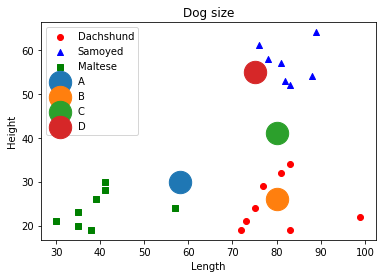

In [123]:
plt.scatter(dach_l,dach_h,c='red',label='Dachshund')
plt.scatter(samo_l,samo_h,c='blue',marker ='^',label = "Samoyed")
plt.scatter(mal_l,mal_h, c ='green',marker ='s',label = "Maltese")
#C는 마커의 색깔, label은 분류이름, 마커 ^는 세모, 마커 s는 네모 
plt.scatter(A[0][0],A[0][1],s= 500,label = "A")
plt.scatter(B[0][0],B[0][1],s= 500,label = "B")
plt.scatter(C[0][0],C[0][1],s= 500,label = "C")
plt.scatter(D[0][0],D[0][1],s= 500,label = "D")
#plt.scatter에서 s는 사이즈를 의미, A,B,C,D의 사이즈를 크게 출력함
plt.xlabel("Length")
plt.ylabel("Height")
plt.title("Dog size")
plt.legend(loc ="upper left")

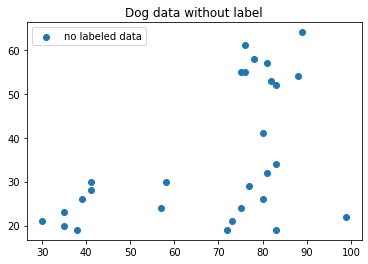

In [124]:
#5.6
dach_l = [75,77,83,81,73,99,72,83]
dach_h = [24,29,19,32,21,22,19,34]
samo_l = [76,78,82,88,76,83,81,89]
samo_h = [55,58,53,54,61,52,57,64]
mal_l = [35,39,38,41,30,57,41,35]
mal_h = [23,26,19,30,21,24,28,20]
A_l = [58]
A_h = [30]
B_l= [80]
B_h= [26]
C_l= [80]
C_h= [41]
D_l= [75]
D_h= [55]

#리스트를 이어서 ndarray의 형태로 표현
dog_l = np.array(dach_l+samo_l+mal_l+A_l+B_l+C_l+D_l) #더하기 연산을 통해서 리스트 연결
dog_h = np.array(dach_h+samo_h+mal_h+A_h+B_h+C_h+D_h)
dog_data = np.column_stack((dog_l,dog_h))

plt.scatter(dog_l,dog_h,label = "no labeled data")
plt.title("Dog data without label")
plt.legend(loc ="upper left")

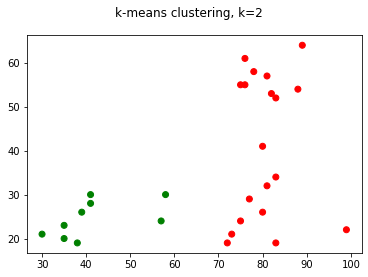

In [125]:
from sklearn import cluster

def kmeans_predict_plot(X,k): #K평균 알고리즘 사용
  model = cluster.KMeans(n_clusters =k) #sklearn에서 제공하는 cluster 모듈 사용
  model.fit(X) #모델에 x값 피팅하여 이를 바탕으로 라벨링을 하는 기능 및 시각화 기능 추가함
  labels = model.predict(X)
  colors = np.array(['red','green','blue','magenta'])
  plt.suptitle("k-means clustering, k={}".format(k))
  plt.scatter(X[:,0],X[:,1],color = colors[labels])

kmeans_predict_plot(dog_data, k=2)

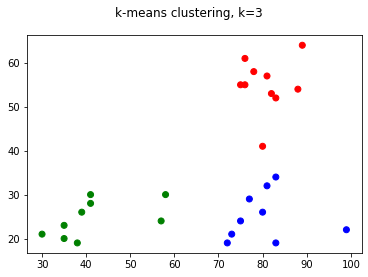

In [126]:
kmeans_predict_plot(dog_data, k=3)

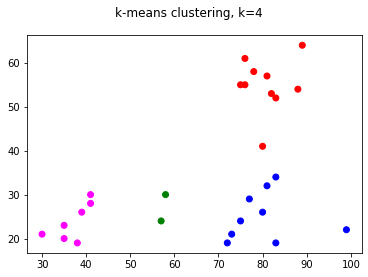

In [127]:
kmeans_predict_plot(dog_data, k=4)